# Data Pre-processing
Before feeding data into a model, we have to process it first.
In this example the data is going to be fed into a model which predicts the runs
scored by both teams during a match.

# Downloading the dataset

The CSV dataset can be handled by using a pandas dataframe.

# Imports


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_df = pd.read_csv('/content/IPL_train_ dataset 2008-2021.csv')

In [ ]:
raw_df.head(10)

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,RCB,2 wickets,Harshal Patel,MA Chidambaram Stadium,Chepauk
1,2021,Chennai Super Kings,Delhi Capitals,188.0,190.0,Delhi Capitals,Field,Capitals,7 wickets,Shikhar Dhawan,Wankhede Stadium,Mumbai
2,2021,Kolkata Knight Riders,Sunrisers Hyderabad,187.0,177.0,Sunrisers Hyderabad,Field,KKR,10 runs,Nitish Rana,MA Chidambaram Stadium,Chepauk
3,2021,Punjab Kings,Rajasthan Royals,221.0,217.0,Rajasthan Royals,Field,Punjab,4 runs,Sanju Samson,Wankhede Stadium,Mumbai
4,2021,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,Mumbai,10 runs,Rahul Chahar,MA Chidambaram Stadium,Chepauk
5,2021,Royal Challengers Bangalore,Sunrisers Hyderabad,149.0,143.0,Sunrisers Hyderabad,Field,RCB,6 runs,Glenn Maxwell,MA Chidambaram Stadium,Chepauk
6,2021,Delhi Capitals,Rajasthan Royals,147.0,150.0,Rajasthan Royals,Field,Royals,3 wickets,Jaydev Unadkat,Wankhede Stadium,Mumbai
7,2021,Punjab Kings,Chennai Super Kings,106.0,107.0,Chennai Super Kings,Field,Super,6 wickets,Deepak Chahar,Wankhede Stadium,Mumbai
8,2021,Mumbai Indians,Sunrisers Hyderabad,150.0,137.0,Mumbai Indians,Bat,Mumbai,13 runs,Kieron Pollard,MA Chidambaram Stadium,Chepauk
9,2021,Royal Challengers Bangalore,Kolkata Knight Riders,204.0,166.0,Royal Challengers Bangalore,Bat,RCB,38 runs,AB de Villiers,MA Chidambaram Stadium,Chepauk


# Checking column names for extra whitespace
We can see below that the year column is named as 'year ', which might cause confusion down the road, so let's rename it.

In [ ]:
raw_df.columns

Index(['year ', 'team1', 'team2', 'team1_score', 'team2_score', 'toss_winner',
       'toss_choice', 'winner', 'margin', 'man_of_the_match', 'stadium',
       'place'],
      dtype='object')

In [ ]:
raw_df.rename(columns={'year ':'year'}, inplace=True)

In [ ]:
raw_df.winner.unique()

array(['RCB', 'Capitals', 'KKR', 'Punjab', 'Mumbai', 'Royals', 'Super',
       'Sunrisers', 'Tied', 'Kings', 'No', 'Daredevils', 'Supergiant',
       'Guj', 'Match', 'Supergiants', 'Warriors', 'Chargers', 'Kochi'],
      dtype=object)

In [ ]:
raw_df.replace(to_replace="RCB", value="Royal Challengers Bangalore",inplace=True)
raw_df.replace(to_replace="Capitals", value="Delhi Capitals",inplace=True)
raw_df.replace(to_replace="KKR", value="Kolkata Knight Riders",inplace=True)
raw_df.replace(to_replace="Punjab", value="Punjab Kings",inplace=True)
raw_df.replace(to_replace="Mumbai", value="Mumbai Indians",inplace=True)
raw_df.replace(to_replace="Royals", value="Rajasthan Royals",inplace=True)
raw_df.replace(to_replace="Super", value="Chennai Super Kings",inplace=True)
raw_df.replace(to_replace="Sunrisers", value="Sunrisers Hyderabad",inplace=True)
raw_df.replace(to_replace="Kings", value="Kings XI Punjab",inplace=True)
raw_df.replace(to_replace="Daredevils", value="Delhi Daredevils",inplace=True)
raw_df.replace(to_replace=["Supergiant","Supergiants"], value="Rising Pune Supergiants",inplace=True)
raw_df.replace(to_replace="Guj", value="Gujarat Lions",inplace=True)
raw_df.replace(to_replace="Warriors", value="Pune Warriors",inplace=True)
raw_df.replace(to_replace="Chargers", value="Deccan Chargers",inplace=True)
raw_df.replace(to_replace="Kochi", value="Kochi Tuskers Kerala",inplace=True)

In [ ]:
 # Also handle "Rising Pune Supergiant"
raw_df.replace(to_replace=["Rising Pune Supergiant"], value="Rising Pune Supergiants",inplace=True)

In [ ]:
# Two different names for same stadium
raw_df.replace(to_replace="Zayed Cricket Stadium", value="Sheikh Zayed Stadium",inplace=True)

In [ ]:
raw_df.head()

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,Royal Challengers Bangalore,2 wickets,Harshal Patel,MA Chidambaram Stadium,Chepauk
1,2021,Chennai Super Kings,Delhi Capitals,188.0,190.0,Delhi Capitals,Field,Delhi Capitals,7 wickets,Shikhar Dhawan,Wankhede Stadium,Mumbai Indians
2,2021,Kolkata Knight Riders,Sunrisers Hyderabad,187.0,177.0,Sunrisers Hyderabad,Field,Kolkata Knight Riders,10 runs,Nitish Rana,MA Chidambaram Stadium,Chepauk
3,2021,Punjab Kings,Rajasthan Royals,221.0,217.0,Rajasthan Royals,Field,Punjab Kings,4 runs,Sanju Samson,Wankhede Stadium,Mumbai Indians
4,2021,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,Mumbai Indians,10 runs,Rahul Chahar,MA Chidambaram Stadium,Chepauk


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              884 non-null    int64  
 1   team1             884 non-null    object 
 2   team2             876 non-null    object 
 3   team1_score       856 non-null    float64
 4   team2_score       874 non-null    float64
 5   toss_winner       876 non-null    object 
 6   toss_choice       884 non-null    object 
 7   winner            884 non-null    object 
 8   margin            884 non-null    object 
 9   man_of_the_match  876 non-null    object 
 10  stadium           876 non-null    object 
 11  place             800 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 83.0+ KB


In [ ]:
raw_df.isnull().sum()

year                 0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64

In [ ]:
# Dropping null data
raw_df = raw_df.dropna()
print('After dropping null:', raw_df.isnull().sum(), sep='\n')

After dropping null:
year                0
team1               0
team2               0
team1_score         0
team2_score         0
toss_winner         0
toss_choice         0
winner              0
margin              0
man_of_the_match    0
stadium             0
place               0
dtype: int64


In [ ]:
raw_df.sample(10)

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
591,2012,Delhi Daredevils,Mumbai Indians,207.0,170.0,Mumbai Indians,Field,Delhi Daredevils,37 runs,Virender Sehwag,Feroz Shah Kotla,Delhi
455,2014,Sunrisers Hyderabad,Mumbai Indians,157.0,160.0,Sunrisers Hyderabad,Bat,Mumbai Indians,7 wickets,Ambati Rayudu,Rajiv Gandhi International Stadium,Uppal
280,2017,Kolkata Knight Riders,Rising Pune Supergiants,155.0,158.0,Rising Pune Supergiants,Field,Rising Pune Supergiants,4 wickets,Rahul Tripathi,Eden Gardens,Kolkata
319,2016,Rising Pune Supergiants,Kolkata Knight Riders,160.0,162.0,Kolkata Knight Riders,Field,Kolkata Knight Riders,2 wickets,Suryakumar Yadav,Maharashtra Cricket Association Stadium,Pune
838,2008,Mumbai Indians,Deccan Chargers,154.0,155.0,Deccan Chargers,Field,Deccan Chargers,10 wickets,Adam Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians
290,2017,Kings XI Punjab,Mumbai Indians,230.0,223.0,Mumbai Indians,Field,Kings XI Punjab,7 runs,Wriddhiman Saha,Wankhede Stadium,Mumbai Indians
657,2011,Delhi Daredevils,Kings XI Punjab,231.0,202.0,Kings XI Punjab,Field,Delhi Daredevils,29 runs,David Warner,Feroz Shah Kotla,Delhi
26,2021,Chennai Super Kings,Mumbai Indians,218.0,219.0,Mumbai Indians,Field,Mumbai Indians,4 wickets,Kieron Pollard,Arun Jaitley Stadium,Delhi
233,2018,Sunrisers Hyderabad,Kolkata Knight Riders,172.0,173.0,Sunrisers Hyderabad,Bat,Kolkata Knight Riders,5 wickets,Chris Lynn,Rajiv Gandhi International Stadium,Uppal
156,2019,Kings XI Punjab,Delhi Capitals,163.0,166.0,Delhi Capitals,Field,Delhi Capitals,5 wickets,Shreyas Iyer,Feroz Shah Kotla,Delhi


<ipython-input-18-f0b6665c2b60>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), annot=True, fmt= '.2f')


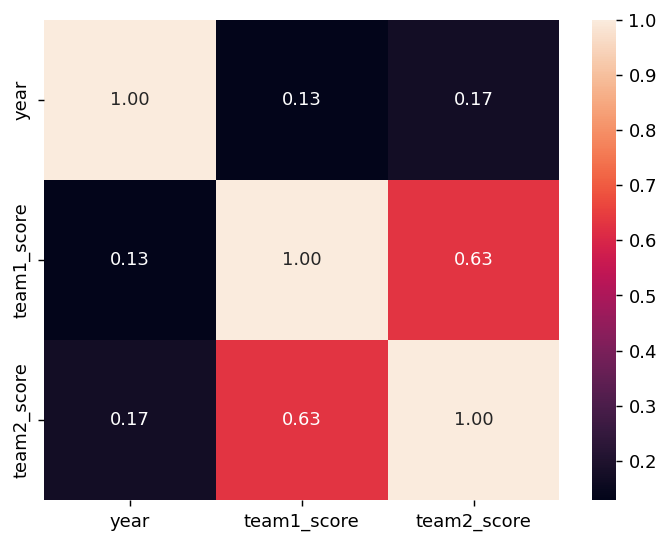

In [ ]:
plt.figure(dpi=130)
sns.heatmap(raw_df.corr(), annot=True, fmt= '.2f')
plt.show()

In [ ]:
raw_df.winner.unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Mumbai Indians',
       'Rajasthan Royals', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Tied', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiants', 'Gujarat Lions', 'No', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

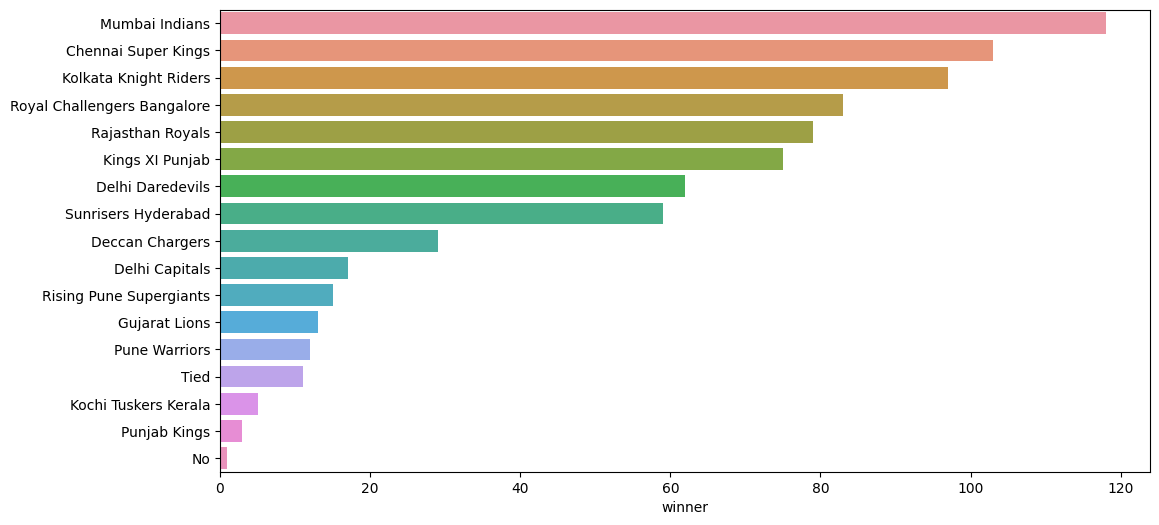

In [ ]:
plt.figure(figsize=(12,6))
data = raw_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

In [ ]:
raw_df = raw_df[raw_df['winner'] != "No"]

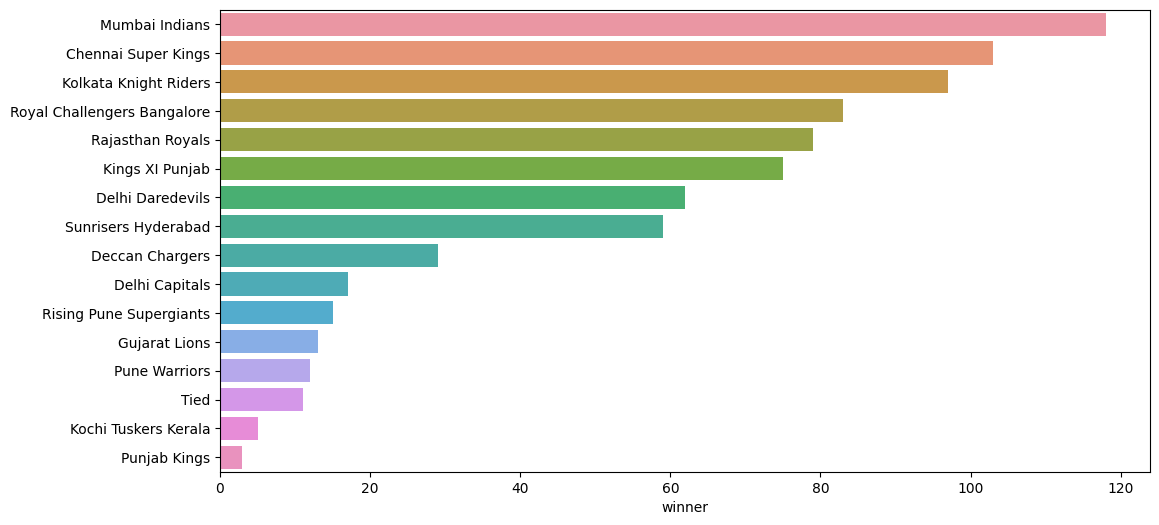

In [ ]:
plt.figure(figsize=(12,6))
data = raw_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

# Dropping unnecessary data
* **Margin, winner & MOTM**: We won't know about the margin by which any team won until the end
of the match.
* **Place**: This is redundant data, we know the stadium where the match is held, so we don't require the place data with it.

In [ ]:
raw_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
raw_df

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,stadium
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,MA Chidambaram Stadium
1,2021,Chennai Super Kings,Delhi Capitals,188.0,190.0,Delhi Capitals,Field,Wankhede Stadium
2,2021,Kolkata Knight Riders,Sunrisers Hyderabad,187.0,177.0,Sunrisers Hyderabad,Field,MA Chidambaram Stadium
3,2021,Punjab Kings,Rajasthan Royals,221.0,217.0,Rajasthan Royals,Field,Wankhede Stadium
4,2021,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,MA Chidambaram Stadium
...,...,...,...,...,...,...,...,...
878,2008,Deccan Chargers,Chennai Super Kings,147.0,148.0,Deccan Chargers,Bat,Rajiv Gandhi International Stadium
880,2008,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Punjab Cricket Association Stadium
881,2008,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Wankhede Stadium
882,2008,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Wankhede Stadium


In [ ]:
raw_df.describe()

,year,team1_score,team2_score
count,781.000000,781.000000,781.000000
mean,2013.985915,162.475032,149.770807
std,3.778625,29.718180,29.579055
min,2008.000000,67.000000,44.000000
25%,2011.000000,143.000000,133.000000
50%,2014.000000,163.000000,151.000000
75%,2017.000000,182.000000,169.000000
max,2021.000000,263.000000,223.000000


In [ ]:
# Normalize years
eps = 1e-8
years = raw_df.year
mean_year = np.mean(years)
var_year = np.var(years)
years -= mean_year
years /= np.sqrt(var_year + eps)
print("Mean: ",np.mean(years), "Var: ", np.var(years))
raw_df.year = years

Mean:  1.179082439878476e-14 Var:  0.9999999992987245


In [ ]:
raw_df.describe()

,year,team1_score,team2_score
count,7.810000e+02,781.000000,781.000000
mean,1.179082e-14,162.475032,149.770807
std,1.000641e+00,29.718180,29.579055
min,-1.585167e+00,67.000000,44.000000
25%,-7.907186e-01,143.000000,133.000000
50%,3.729805e-03,163.000000,151.000000
75%,7.981782e-01,182.000000,169.000000
max,1.857443e+00,263.000000,223.000000


In [ ]:
raw_df.head()

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,stadium
0,1.857443,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,MA Chidambaram Stadium
1,1.857443,Chennai Super Kings,Delhi Capitals,188.0,190.0,Delhi Capitals,Field,Wankhede Stadium
2,1.857443,Kolkata Knight Riders,Sunrisers Hyderabad,187.0,177.0,Sunrisers Hyderabad,Field,MA Chidambaram Stadium
3,1.857443,Punjab Kings,Rajasthan Royals,221.0,217.0,Rajasthan Royals,Field,Wankhede Stadium
4,1.857443,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,MA Chidambaram Stadium


Encoding the toss winner column. If team1 wins the toss then 1 else 0

In [ ]:
for i in range(len(raw_df)):
  if raw_df.toss_winner.values[i] == raw_df.team1.values[i]:
    raw_df.toss_winner.values[i] = 1
  else:
    raw_df.toss_winner.values[i] = 0

In [ ]:
raw_df.sample(5)

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,stadium
472,0.003730,Royal Challengers Bangalore,Chennai Super Kings,154.0,160.0,0,Field,M Chinnaswamy Stadium
467,0.003730,Kings XI Punjab,Mumbai Indians,156.0,159.0,0,Field,Punjab Cricket Association Stadium
748,-1.055535,Kolkata Knight Riders,Royal Challengers Bangalore,160.0,162.0,0,Field,M Chinnaswamy Stadium
208,1.062994,Royal Challengers Bangalore,Kolkata Knight Riders,175.0,176.0,0,Field,M Chinnaswamy Stadium
738,-1.055535,Mumbai Indians,Deccan Chargers,178.0,115.0,1,Bat,Brabourne Stadium


# Encoding Toss choice
For toss choice, we'll try to make it a lot simpler

Instead of encoding it to 'Bat' or 'Field', we'll encode it such that if team1 gets to bat first then it is 1 else it is set to 0

In [ ]:
for i in range(len(raw_df)):
  if (raw_df.toss_winner.values[i] and raw_df.toss_choice.values[i] == 'Bat') or (not raw_df.toss_winner.values[i] and raw_df.toss_choice.values[i] == 'Field'):
    raw_df.toss_choice.values[i] = 1
  else:
    raw_df.toss_choice.values[i] = 0

# Encoding text
Machine learning models don't understand text, so the fields like team1, team2 and stadium have to be encoded.

### Label encoding
One way to go about this is to just give a number to each of the different names. In this way, (short forms used)

RCB = 1, CSK = 2, ..., MI  = 15

But, we want each of our inputs to have equal weightage when assessed by a model, which is the primary reason for normalizing all the fields.

Another way to go about this is to use One Hot encoding

## One Hot encoding

Now let's try to understand what one hot encoding is with our current dataset

We have 15 teams and we want to encode them with equal weightage.

So, let's create a vector with 15 dimensions, in which each team corresponds to a dimension, and has a value of one in it. In all other dimensions, its value is 0.

Therefore, RCB = [1,0,...,0], CSK = [0,1,...,0], ..., MI  = [0,0,...,1]

In [ ]:
for stadium in raw_df.stadium.unique():
  print(stadium)
stadiums = raw_df.stadium.unique()
teams = raw_df.team1.unique()

MA Chidambaram Stadium
Wankhede Stadium
Narendra Modi Stadium
Arun Jaitley Stadium
Sheikh Zayed Stadium
Eden Gardens
Sawai Mansingh Stadium
Feroz Shah Kotla
M Chinnaswamy Stadium
Rajiv Gandhi International Stadium
Punjab Cricket Association IS Bindra Stadium
Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium
Maharashtra Cricket Association Stadium
Holkar Cricket Stadium
Saurashtra Cricket Association Stadium
Green Park
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Shaheed Veer Narayan Singh International Stadium
Sardar Patel Stadium
Punjab Cricket Association Stadium
Brabourne Stadium
JSCA International Stadium Complex
Barabati Stadium
Subrata Roy Sahara Stadium
Himachal Pradesh Cricket Association Stadium
Nehru Stadium
Dr DY Patil Sports Academy
Vidarbha Cricket Association Stadium
Newlands
St George's Park
Kingsmead
SuperSport Park
Buffalo Park
New Wanderers Stadium
De Beers Diamond Oval
OUTsurance Oval


In [ ]:
def stadium_encoder(stadium_name):
  return [1 if stadium == stadium_name else 0 for stadium in stadiums]

for i in range(len(raw_df)):
  raw_df.stadium.values[i] = stadium_encoder(raw_df.stadium.values[i])

In [ ]:
def team_encoder(team_name):
  return [1 if team == team_name else 0 for team in teams]

for i in range(len(raw_df)):
  raw_df.team1.values[i] = team_encoder(raw_df.team1.values[i])
  raw_df.team2.values[i] = team_encoder(raw_df.team2.values[i])

In [ ]:
raw_df

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,stadium
0,1.857443,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",159.0,160.0,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1.857443,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",188.0,190.0,0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1.857443,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",187.0,177.0,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1.857443,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",221.0,217.0,0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1.857443,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",152.0,142.0,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
878,-1.585167,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",147.0,148.0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
880,-1.585167,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",221.0,180.0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
881,-1.585167,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",192.0,87.0,0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
882,-1.585167,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",112.0,116.0,1,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
inputs_df = raw_df.drop(columns=["team1_score", "team2_score"], axis=1)
outputs_df = raw_df.drop(columns=["year","team1","team2","toss_winner","toss_choice","stadium"])

In [ ]:
inputs_df.sample(5)

,year,team1,team2,toss_winner,toss_choice,stadium
401,0.268546,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
205,1.062994,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
383,0.268546,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
130,1.327810,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
370,0.268546,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
outputs_df.sample(5)

,team1_score,team2_score
505,119.0,124.0
732,163.0,164.0
273,157.0,96.0
391,187.0,179.0
812,147.0,151.0


In [ ]:
inputs_list = []
for i in range(len(inputs_df)):
  input_vector = [inputs_df.year.values[i]]
  for j in inputs_df.team1.values[i]:
    input_vector.append(j)
  for j in inputs_df.team2.values[i]:
    input_vector.append(j)
  input_vector.append(inputs_df.toss_winner.values[i])
  input_vector.append(inputs_df.toss_choice.values[i])
  for j in inputs_df.stadium.values[i]:
    input_vector.append(j)
  inputs_list.append(input_vector)

inputs_df["final_inputs"] = inputs_list

In [ ]:
inputs_df.sample(5)

,year,team1,team2,toss_winner,toss_choice,stadium,final_inputs
597,-0.525902,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.5259024471599061, 0, 0, 0, 0, 0, 0, 0, 0, ..."
566,-0.525902,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",0,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-0.5259024471599061, 0, 1, 0, 0, 0, 0, 0, 0, ..."
761,-1.055535,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-1.0555346989096106, 1, 0, 0, 0, 0, 0, 0, 0, ..."
554,-0.261086,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.26108632128505377, 0, 0, 0, 0, 0, 0, 1, 0,..."
670,-0.790719,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.7907185730347583, 0, 1, 0, 0, 0, 0, 0, 0, ..."
